In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import keras
from keras.models import Sequential, load_model
from plot_conf import *

/cvmfs/icecube.opensciencegrid.org/py2-v2/RHEL_6_x86_64/lib/python2.7/site-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/cvmfs/icecube.opensciencegrid.org/py2-v2/RHEL_6_x86_64/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
input_data = np.array(np.load('./charge.npy'))
output_data = np.load('./truevals.npy')

In [5]:
tvt_ratio=[3,2,2] ##ratio of test validation and test dataset
data_len = len(input_data)
test_end = int(float(tvt_ratio[0])/np.sum(tvt_ratio)*data_len)
valid_end = int(float(tvt_ratio[1])/np.sum(tvt_ratio)*data_len)+test_end
print 'Range of training dataset {}:{}'.format(0,test_end)
print 'Range of validation dataset {}:{}'.format(test_end+1,valid_end)
print 'Range of test dataset {}:{}'.format(valid_end+1,data_len)

Range of training dataset 0:9214
Range of validation dataset 9215:15357
Range of test dataset 15358:21501


In [6]:
test  = input_data[valid_end+1:data_len-1]/100
test_out = np.log10(np.concatenate(output_data[valid_end+1:data_len-1, 0:1]))

In [7]:
estimator = load_model('./train_hist/model.h5')

In [8]:
res = estimator.predict(np.expand_dims(test, axis=4), verbose=1)

6142/6142 [==============================] - 1094s  


/cvmfs/icecube.opensciencegrid.org/py2-v2/RHEL_6_x86_64/lib/python2.7/site-packages/numpy/ma/core.py:3900: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")
/cvmfs/icecube.opensciencegrid.org/py2-v2/RHEL_6_x86_64/lib/python2.7/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


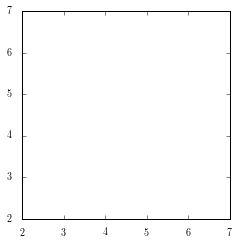

In [9]:

H, xedges, yedges = np.histogram2d(test_out, np.squeeze(res), bins=(np.linspace(2,7,10), np.linspace(2,7,10)))
H = H.T  # Let each row list bins with common y range.
H=[np.array(i)/np.sum(i) for i in H]
fig, ax = newfig(0.9)
plt.imshow(H, interpolation='nearest', origin='low',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])



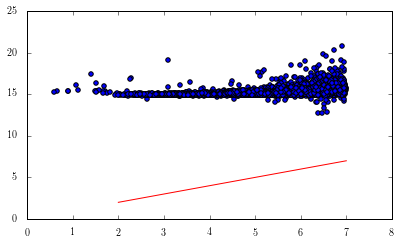

In [10]:

plt.scatter(test_out, res)
plt.plot(np.linspace(2,7,10), np.linspace(2,7,10),color='red')
plt.show()